In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.chdir(os.getcwd().replace('/notebooks', ''))

In [26]:
# Load the data
filepath = './data/raw/train.csv'
data = pd.read_csv(filepath, index_col='Id')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [28]:
# Check for missing values
lst_of_missing = []
for col in data.columns:
    if data[col].isnull().sum() > 0:
        lst_of_missing.append(col)
        print(f'{col:<13}: {data[col].isnull().sum(): <4} missing values - {data[col].isnull().sum() / len(data) * 100:.2f}% - {data[col].dtype}')

LotFrontage  : 259  missing values - 17.74% - float64
Alley        : 1369 missing values - 93.77% - object
MasVnrType   : 872  missing values - 59.73% - object
MasVnrArea   : 8    missing values - 0.55% - float64
BsmtQual     : 37   missing values - 2.53% - object
BsmtCond     : 37   missing values - 2.53% - object
BsmtExposure : 38   missing values - 2.60% - object
BsmtFinType1 : 37   missing values - 2.53% - object
BsmtFinType2 : 38   missing values - 2.60% - object
Electrical   : 1    missing values - 0.07% - object
FireplaceQu  : 690  missing values - 47.26% - object
GarageType   : 81   missing values - 5.55% - object
GarageYrBlt  : 81   missing values - 5.55% - float64
GarageFinish : 81   missing values - 5.55% - object
GarageQual   : 81   missing values - 5.55% - object
GarageCond   : 81   missing values - 5.55% - object
PoolQC       : 1453 missing values - 99.52% - object
Fence        : 1179 missing values - 80.75% - object
MiscFeature  : 1406 missing values - 96.30% - object


In [29]:
lst_of_numerical = []
lst_of_categorical = []
for col in data.columns:
    if data[col].dtype == 'object':
        lst_of_categorical.append(col)
    else:
        lst_of_numerical.append(col)

# Numerical Features

### Missing

In [30]:
num_missing = set(lst_of_numerical)&set(lst_of_missing)
num_missing.add("SalePrice")
data[list(num_missing)].head(10)

,GarageYrBlt,SalePrice,LotFrontage,MasVnrArea
Id,,,,
1,2003.0,208500,65.0,196.0
2,1976.0,181500,80.0,0.0
3,2001.0,223500,68.0,162.0
4,1998.0,140000,60.0,0.0
5,2000.0,250000,84.0,350.0
6,1993.0,143000,85.0,0.0
7,2004.0,307000,75.0,186.0
8,1973.0,200000,NaN,240.0
9,1931.0,129900,51.0,0.0


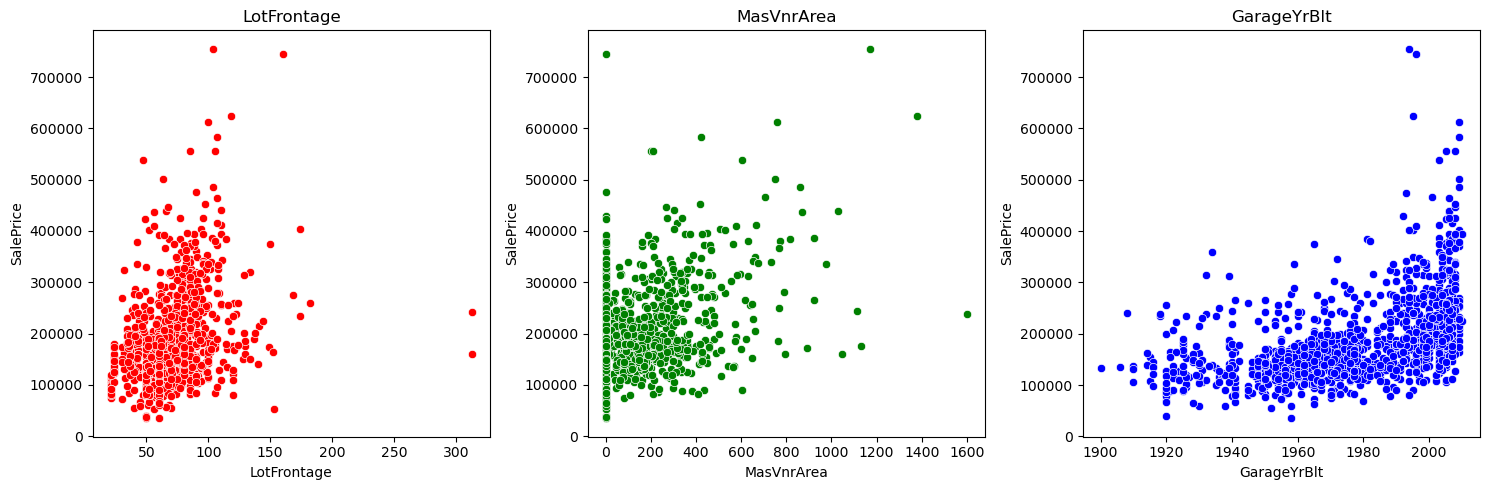

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='LotFrontage', y='SalePrice', data=data, ax=ax[0], color='r').set(title='LotFrontage')
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=data, ax=ax[1], color='g').set(title='MasVnrArea')
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=data, ax=ax[2], color='b').set(title='GarageYrBlt')
plt.tight_layout()
plt.show()

- Đặc trưng 'LotFrontage' có 2 giá trị ngoại lai, nên chúng ta sẽ loại bỏ chúng trước khi thực hiện các phương pháp xử lý dữ liệu bị thiếu bằng giá trị trung bình. 
- Đặc trưng 'GarageYrBlt' có 81 giá trị bị thiếu, chúng ta sẽ thay thế chúng bằng phương pháp xử lý tuyến tính tại vì nhà càng mới thì giá trị càng cao.


In [32]:
data.loc[:,['MasVnrArea', 'MasVnrType','SalePrice']][data['MasVnrArea'].isnull()]

,MasVnrArea,MasVnrType,SalePrice
Id,,,
235,NaN,NaN,216500
530,NaN,NaN,200624
651,NaN,NaN,205950
937,NaN,NaN,184900
974,NaN,NaN,182000
978,NaN,NaN,199900
1244,NaN,NaN,465000
1279,NaN,NaN,237000


Bởi vì giá trị missing của 'MasVnrArea' và 'MasVnrType' là giống nhau, nên chúng ta sẽ thay thế chúng bằng giá trị phổ biến nhất của 'MasVnrType' là 'None' và giá trị trung bình của 'MasVnrArea' là 0.

### Correlation 
- The correlation coefficient is a statistical measure that describes the strength and direction of a relationship between two variables.
- It ranges from -1 to 1.
- The closer the correlation coefficient is to 1, the more positively correlated the variables are.
- The closer the correlation coefficient is to -1, the more negatively correlated the variables are.
- The closer the correlation coefficient is to 0, the weaker the relationship between the variables.
- The correlation coefficient is calculated as follows:
$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $$

In [33]:
correlation_matrix = data[lst_of_numerical].corr()
print(correlation_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

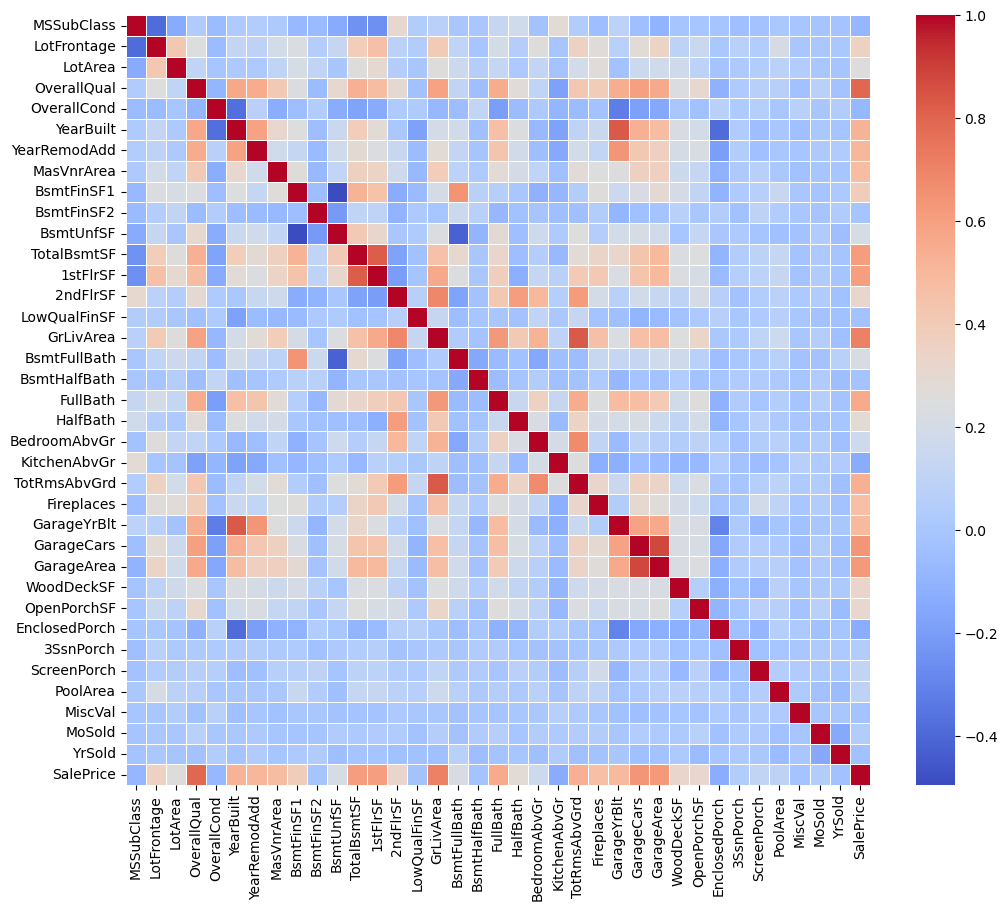

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3532\57435265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_saleprice.index,y=corr_with_saleprice.values, palette='coolwarm')


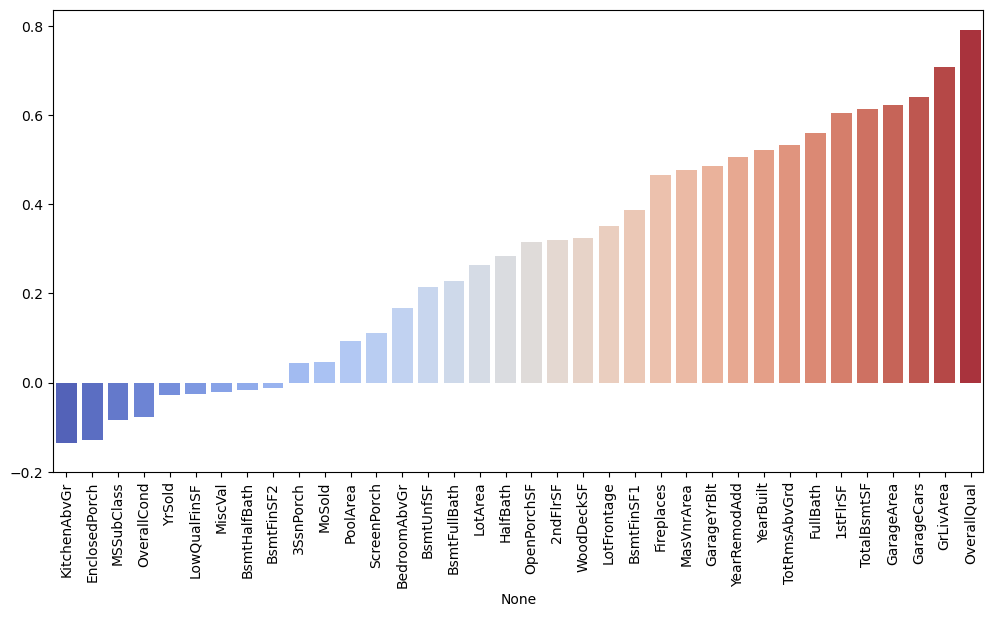

In [35]:
corr_with_saleprice = correlation_matrix.loc[:'YrSold', 'SalePrice'].sort_values(ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_saleprice.index,y=corr_with_saleprice.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(-0.2,1,0.2))
plt.show()

# Categorical Features

### Missing

In [36]:
cat_missing = set(lst_of_categorical)&set(lst_of_missing)
data[list(cat_missing)].head(10)

,BsmtQual,Fence,BsmtFinType2,MiscFeature,GarageQual,BsmtFinType1,GarageType,GarageFinish,BsmtExposure,GarageCond,BsmtCond,Electrical,Alley,FireplaceQu,MasVnrType,PoolQC
Id,,,,,,,,,,,,,,,,
1,Gd,NaN,Unf,NaN,TA,GLQ,Attchd,RFn,No,TA,TA,SBrkr,NaN,NaN,BrkFace,NaN
2,Gd,NaN,Unf,NaN,TA,ALQ,Attchd,RFn,Gd,TA,TA,SBrkr,NaN,TA,NaN,NaN
3,Gd,NaN,Unf,NaN,TA,GLQ,Attchd,RFn,Mn,TA,TA,SBrkr,NaN,TA,BrkFace,NaN
4,TA,NaN,Unf,NaN,TA,ALQ,Detchd,Unf,No,TA,Gd,SBrkr,NaN,Gd,NaN,NaN
5,Gd,NaN,Unf,NaN,TA,GLQ,Attchd,RFn,Av,TA,TA,SBrkr,NaN,TA,BrkFace,NaN
6,Gd,MnPrv,Unf,Shed,TA,GLQ,Attchd,Unf,No,TA,TA,SBrkr,NaN,NaN,NaN,NaN
7,Ex,NaN,Unf,NaN,TA,GLQ,Attchd,RFn,Av,TA,TA,SBrkr,NaN,Gd,Stone,NaN
8,Gd,NaN,BLQ,Shed,TA,ALQ,Attchd,RFn,Mn,TA,TA,SBrkr,NaN,TA,Stone,NaN
9,TA,NaN,Unf,NaN,Fa,Unf,Detchd,Unf,No,TA,TA,FuseF,NaN,TA,NaN,NaN


In [37]:
for col in cat_missing:
    print(f'{col:<13}: {data[col].isnull().sum(): <4} missing values - {data[col].isnull().sum() / len(data) * 100:.2f}% - {len(data[col].unique())} unique values')

BsmtQual     : 37   missing values - 2.53% - 5 unique values
Fence        : 1179 missing values - 80.75% - 5 unique values
BsmtFinType2 : 38   missing values - 2.60% - 7 unique values
MiscFeature  : 1406 missing values - 96.30% - 5 unique values
GarageQual   : 81   missing values - 5.55% - 6 unique values
BsmtFinType1 : 37   missing values - 2.53% - 7 unique values
GarageType   : 81   missing values - 5.55% - 7 unique values
GarageFinish : 81   missing values - 5.55% - 4 unique values
BsmtExposure : 38   missing values - 2.60% - 5 unique values
GarageCond   : 81   missing values - 5.55% - 6 unique values
BsmtCond     : 37   missing values - 2.53% - 5 unique values
Electrical   : 1    missing values - 0.07% - 6 unique values
Alley        : 1369 missing values - 93.77% - 3 unique values
FireplaceQu  : 690  missing values - 47.26% - 6 unique values
MasVnrType   : 872  missing values - 59.73% - 4 unique values
PoolQC       : 1453 missing values - 99.52% - 4 unique values


In [38]:
Bstmnt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
Garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

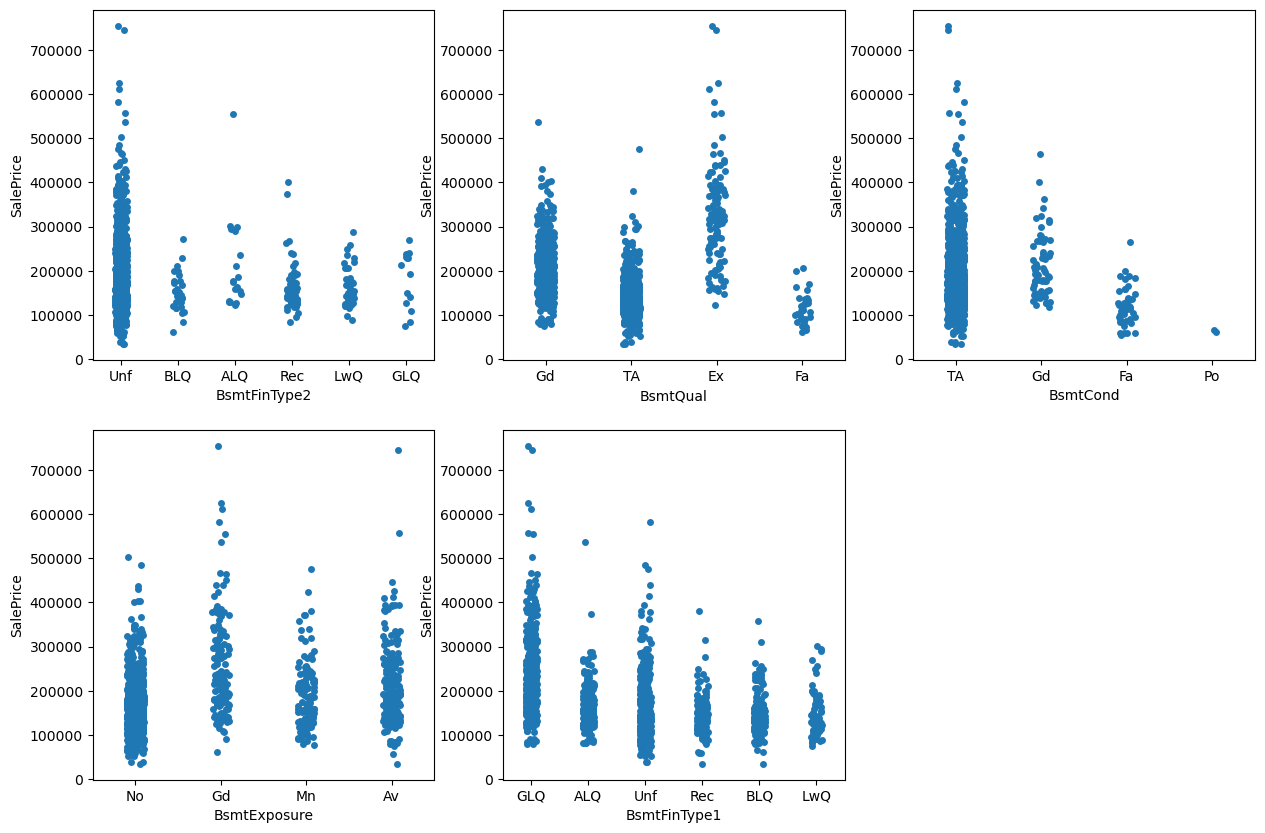

In [39]:
fig2, ax2 = plt.subplots(2, 3, figsize=(15, 10))
ax2.flat[-1].set_visible(False)
for r in range(2):
    for c in range(3):
        sns.stripplot(data=data,x=Bstmnt_cols[r*3+c-1] , y="SalePrice" , ax=ax2[r,c])

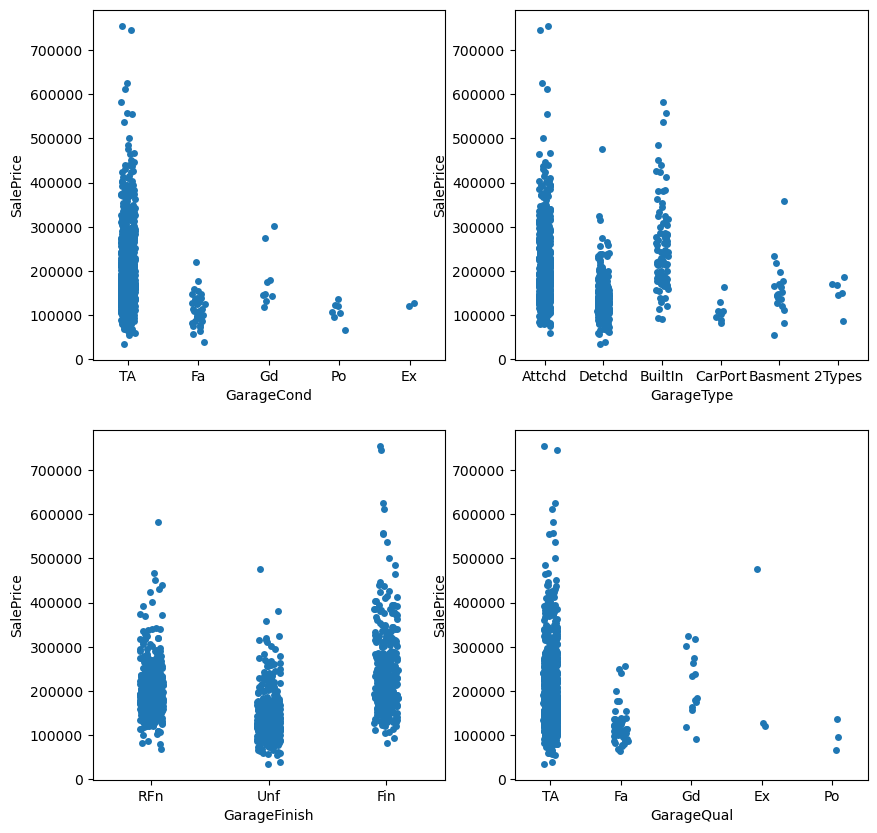

In [42]:
fig3, ax3 = plt.subplots(2, 2, figsize=(10, 10))
for r in range(2):
    for c in range(2):
        sns.stripplot(data=data,x=Garage_cols[r*2+c-1] , y="SalePrice" , ax=ax3[r,c])
plt.show()

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

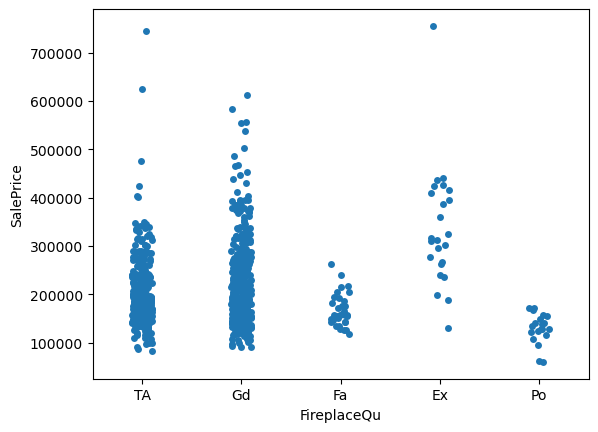

In [49]:
sns.stripplot(data=data,x="FireplaceQu" , y="SalePrice")

- Ta sẽ chuẩn hóa các dữ liệu để cân bằng bằng cách tăng thêm các giá trị thiểu số để tất cả các categories có số lượng điểm như nhau. Chia Saleprice thành 5 khoảng, sau đó sử dụng phương pháp xử lý dữ liệu bị thiếu bằng giá trị phổ biến nhất.